# 🏁 Módulo 4 – Preguntas de Negocio

**Objetivo del módulo**  
Aplicar todo lo aprendido (limpieza, EDA, visualización, agrupaciones) para **responder preguntas de negocio reales** con Python y Pandas.

**¿Por qué es importante?**  
Un analista de datos no solo organiza tablas: transforma datos en **insights accionables** que guían decisiones de producto, marketing o estrategia. Saber plantear y contestar preguntas concretas demuestra el valor práctico de tus habilidades técnicas.

---

En este notebook resolverás **20 preguntas** usando el dataset limpio `salarios_pais.csv`.  
Cada pregunta viene acompañada de una celda *Markdown* (enunciado) y su celda de código con la solución.



---
## 0 · Setup
Cargamos librerías y configuramos Seaborn para que los gráficos se vean con un estilo agradable.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from cursos.analisis_datos.utils.paths import DATA_PROCESSED_DIR

In [2]:
path_salarios_pais = DATA_PROCESSED_DIR / "salarios_pais.csv"
path_salarios_pais = str(path_salarios_pais)
print(f"Ruta del archivo salarios_pais: {path_salarios_pais}")
print(f"existe archivo salarios_pais: {Path(path_salarios_pais).exists()}")
df_salarios_pais = pd.read_csv(filepath_or_buffer=path_salarios_pais, sep=',', encoding='utf-8')
df_salarios_pais.head()

Ruta del archivo salarios_pais: D:\Isaac Escobar\Documents\Dev\pydatapanama-cursos\cursos\analisis_datos\data\processed\salarios_pais.csv
existe archivo salarios_pais: True


,nombre,apellido,edad,pais,educacion_universitaria,nombre_de_la_empresa,cargo,anos_en_la_empresa,sueldo_anual_dolares,bono_anual_euros,bono_anual_dolares,capital,cantidad_de_habitantes,PIB,ingreso_per_capita,compensacion_total,senioridad
0,José,López,36,Chile,Sí,Mercado Libre,Python Developer,2,71841.0,4981.0,5479.1,Santiago,19116209.0,3.170000e+11,16580.0,77320.1,Junior
1,Fernanda,Vargas,39,Chile,Sí,Amazon,AI Software Engineer,2,142115.0,1252.0,1377.2,Santiago,19116209.0,3.170000e+11,16580.0,143492.2,Junior
2,Fernanda,Ramírez,30,Colombia,No,Facebook,Machine Learning Engineer,2,92278.0,5262.0,5788.2,Bogotá,51874024.0,3.430000e+11,6611.0,98066.2,Junior
3,José,Gómez,35,Chile,Sí,Mercado Libre,Python Developer,12,97130.0,3671.0,4038.1,Santiago,19116209.0,3.170000e+11,16580.0,101168.1,Senior
4,Ana,Pérez,32,Panamá,No,Amazon,Project Manager,2,61413.0,10190.0,11209.0,Ciudad de Panamá,4468000.0,7.600000e+10,16995.0,72622.0,Junior


## 1️⃣ Pregunta  
**¿Cuál es la compensación total promedio en el dataset?**

### ¿Por qué importa?  
La media salarial brinda una referencia rápida para entender el nivel general de pago en la organización o sector. Permite comparar con benchmarks externos y detectar si la empresa está ofreciendo compensaciones competitivas.

### Pista  
La respuesta está a un solo método de distancia sobre la columna `compensacion_total`.

In [4]:
# Calcula la compensación total promedio
promedio_total = df_salarios_pais['compensacion_total'].mean()
promedio_total

np.float64(94583.36970684039)

## 2️⃣ Pregunta  
**¿Quiénes son los 5 empleados con la compensación total más alta?**

### ¿Por qué importa?  
Identificar a los empleados mejor pagados ayuda a:  
- Detectar roles o perfiles críticos con alto valor de mercado.  
- Verificar consistencia salarial interna y posibles brechas injustificadas.  
- Analizar si los niveles de compensación se alinean con la estrategia de retención de talento.

### Pista   
Ordena la columna `compensacion_total` de forma descendente y toma solo las primeras 5 filas.

In [9]:
# Top 5 empleados con mayor compensación total
top_5_empleados = df_salarios_pais.nlargest(5, 'compensacion_total')
top_5_empleados[["nombre","apellido","compensacion_total","pais","cargo"]]

,nombre,apellido,compensacion_total,pais,cargo
94,Luis,Rodríguez,167806.7,Colombia,AI Software Engineer
162,Ana,Morales,165880.7,México,AI Software Engineer
7,Pedro,Herrera,164982.1,México,AI Software Engineer
143,Luis,Herrera,163275.9,Costa Rica,AI Software Engineer
86,Lucía,Flores,162450.4,Argentina,AI Software Engineer


## 3️⃣ Pregunta  
**¿Qué país registra la compensación total promedio más alta?**

### ¿Por qué importa?  
Conocer el país donde los salarios son más altos permite:  
- Evaluar mercados laborales competitivos y su impacto en costes de contratación.  
- Diseñar políticas de compensación diferenciadas por región.  
- Detectar posibles desalineamientos con el costo de vida o la estrategia global de la empresa.

### Pista  
Agrupa por `pais`, calcula el promedio de `compensacion_total` y ordena de mayor a menor.

In [10]:
# País con la compensación promedio más alta
pais_compensacion_promedio = df_salarios_pais.groupby('pais')['compensacion_total'].mean().reset_index()
pais_compensacion_promedio = pais_compensacion_promedio.nlargest(1, 'compensacion_total')
pais_compensacion_promedio

,pais,compensacion_total
2,Colombia,98578.348837


## 4️⃣ Pregunta  
**¿Cómo se distribuye la compensación total según el nivel de senioridad?**  
*(Visualiza la comparación con un boxplot).*

### ¿Por qué importa?  
- Revela si existen diferencias salariales significativas entre Juniors y Seniors.  
- Permite detectar outliers (pagos extremadamente altos o bajos) por nivel.  
- Ayuda a planificar escalas de compensación equitativas y competitivas.

### Pista  
Usa `sns.boxplot()` con `x='senioridad'` y `y='compensacion_total'`.

Text(0.5, 1.0, 'Compensación Total por Nivel de Senioridad')

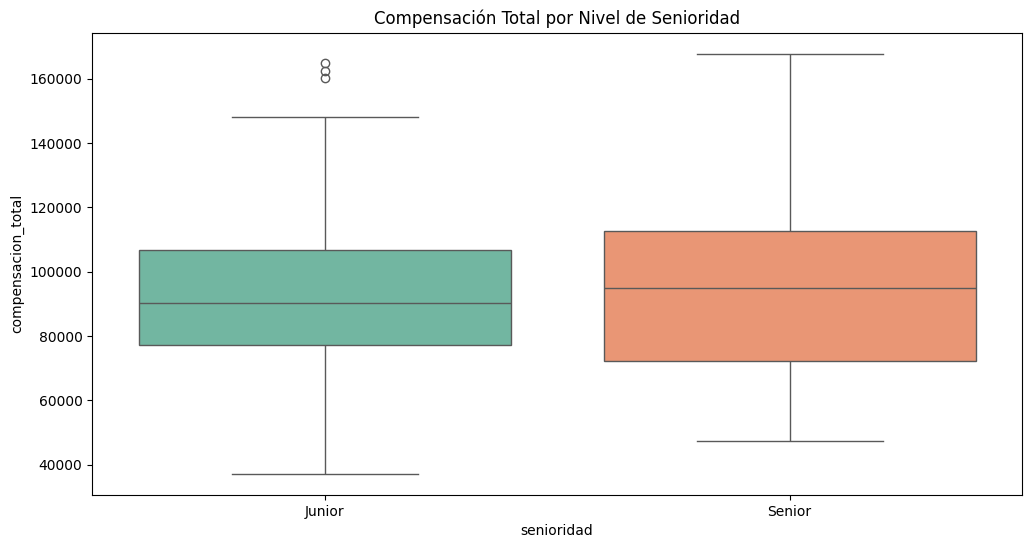

In [13]:
# Boxplot de compensación total por nivel de senioridad
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_salarios_pais, x='senioridad', y='compensacion_total', palette='Set2' ,hue='senioridad')
plt.title('Compensación Total por Nivel de Senioridad')

## 5️⃣ Pregunta  
**¿Existe correlación entre los años en la empresa y la compensación total?**

### ¿Por qué importa?  
- Permite evaluar si la antigüedad impacta directamente en el salario.  
- Ayuda a validar políticas de incremento por permanencia.  
- Detectar una baja correlación podría indicar que la compensación está más ligada a desempeño o rol que a tiempo en la organización.

### Pista  
Calcula el coeficiente de correlación de Pearson entre `anos_en_la_empresa` y `compensacion_total`.

In [16]:
# Correlación entre antigüedad y compensación total
correlacion  = df_salarios_pais["anos_en_la_empresa"].corr(df_salarios_pais["compensacion_total"])
print(f"Correlación entre años en la empresa y compensación total: {correlacion:.2f}")

Correlación entre años en la empresa y compensación total: 0.02


## 6️⃣ Pregunta  
**¿Qué cargo presenta la mediana de compensación total más alta?**

### ¿Por qué importa?  
- La mediana es robusta frente a outliers; refleja el salario “típico” para cada rol.  
- Ayuda a identificar posiciones clave con mayor valor de mercado o responsabilidad.  
- Informa decisiones de contratación y alineación salarial interna.

### Pista  
Agrupa por `cargo`, calcula la **mediana** de `compensacion_total`, ordena en orden descendente y observa el primer resultado.

In [17]:
# Cargo con la mediana de compensación total más alta
cargo_mediana = df_salarios_pais.groupby('cargo')['compensacion_total'].median().reset_index()
cargo_mediana = cargo_mediana.nlargest(1, 'compensacion_total')
cargo_mediana

,cargo,compensacion_total
0,AI Software Engineer,130957.7


## 7️⃣ Pregunta  
**¿Cómo es la distribución de los bonos anuales en dólares?**  
*(Construye un histograma e incluye la curva KDE para visualizar la densidad).*

### ¿Por qué importa?  
- Ayuda a ver si los bonos están concentrados en un rango específico o tienen una cola larga.  
- Detecta outliers que podrían distorsionar el promedio.  
- Facilita comparar políticas de incentivos entre departamentos o países.

### Pista  
Usa `sns.histplot()` sobre la columna `bono_anual_dolares`, pon `bins=30` y `kde=True`.

Text(0.5, 1.0, 'Histograma y KDE de Bonos Anuales en USD')

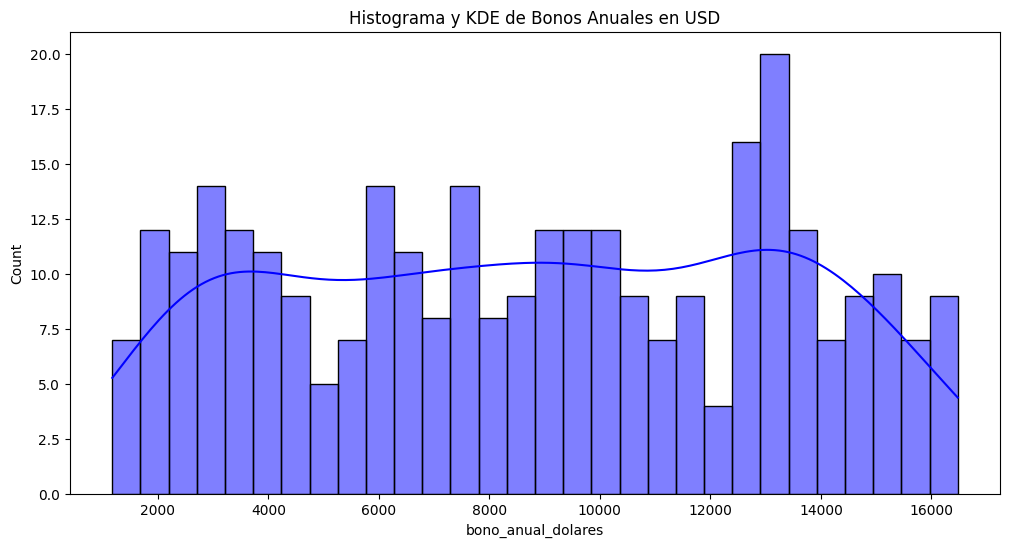

In [ ]:
# Histograma y KDE de los bonos anuales en USD
plt.figure(figsize=(12, 6))
sns.histplot(df_salarios_pais['bono_anual_dolares'], bins=30, kde=True, color='blue')
plt.title('Histograma y KDE de Bonos Anuales en USD')

## 8️⃣ Pregunta  
**¿Qué proporción de empleados proviene de cada país?**  
*(Visualiza el resultado en un barplot).*

### ¿Por qué importa?  
- Mide la **representatividad geográfica** de la fuerza laboral.  
- Ayuda a detectar concentración en un país y oportunidades de diversificación.  
- Sirve como referencia para ajustar políticas de compensación y beneficio regional.

### Pista  
Calcula `value_counts(normalize=True)` sobre la columna `pais`, multiplícalo por 100 para obtener porcentajes y grafícalo con `plot(kind='bar')`.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Colombia'),
  Text(1, 0, 'México'),
  Text(2, 0, 'Argentina'),
  Text(3, 0, 'Costa Rica'),
  Text(4, 0, 'Uruguay'),
  Text(5, 0, 'Chile'),
  Text(6, 0, 'Perú'),
  Text(7, 0, 'Panamá')])

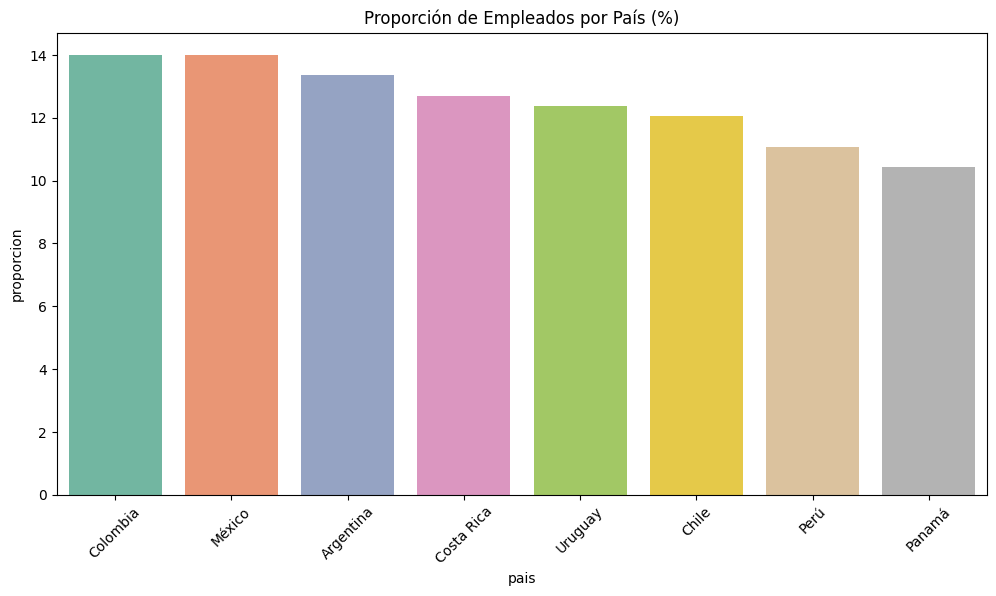

In [22]:
# Proporción de empleados por país (en %)
proporcion_pais = df_salarios_pais['pais'].value_counts(normalize=True) * 100
proporcion_pais = proporcion_pais.reset_index()
proporcion_pais.columns = ['pais', 'proporcion']
plt.figure(figsize=(12, 6))
sns.barplot(data=proporcion_pais, x='pais', y='proporcion', palette='Set2', hue='pais')
plt.title('Proporción de Empleados por País (%)')
plt.xticks(rotation=45)

## 9️⃣ Pregunta  
**¿Cuál es el bono anual máximo registrado para cada cargo?**

### ¿Por qué importa?  
- Revela el techo de incentivos para cada rol.  
- Permite verificar si ciertos cargos reciben bonos excepcionalmente altos (posibles outliers o políticas de bonificación agresivas).  
- Ayuda a diseñar esquemas de reconocimiento competitivos y equitativos.

### Pista  
Agrupa por `cargo`, aplica `max()` a `bono_anual_dolares` y ordena el resultado de mayor a menor.

In [28]:
# Bono anual máximo por cargo

bono_maximo_cargo = df_salarios_pais.groupby('cargo')['bono_anual_dolares'].max().reset_index()
bono_maximo_cargo = bono_maximo_cargo.nlargest(1, 'bono_anual_dolares')
bono_maximo_cargo

,cargo,bono_anual_dolares
7,Python Developer,16476.9


## 🔟 Pregunta  
**¿Cuáles son los 3 países con más empleados que ocupan el cargo de *Data Scientist*?**

### ¿Por qué importa?  
- Indica dónde se concentra el talento de ciencia de datos en la organización.  
- Ayuda a orientar iniciativas de reclutamiento, formación y comunidades locales.  
- Puede revelar hubs de innovación o brechas regionales en ese perfil tan demandado.

### Pista  
Filtra el DataFrame por `cargo == "Data Scientist"` y aplica `value_counts()` sobre la columna `pais`, luego utiliza `.head(3)`.

([0, 1, 2],
 [Text(0, 0, 'Perú'), Text(1, 0, 'Uruguay'), Text(2, 0, 'Argentina')])

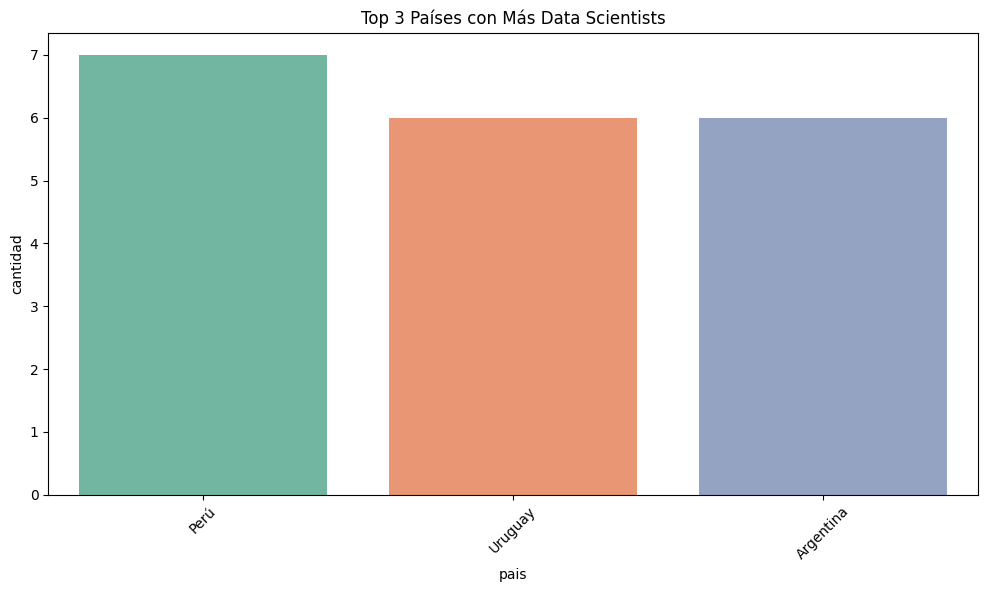

In [31]:
# Top 3 países con más Data Scientists
top_3_paises_data_scientists = df_salarios_pais[df_salarios_pais['cargo'] == 'Data Scientist']['pais'].value_counts().nlargest(3)
top_3_paises_data_scientists = top_3_paises_data_scientists.reset_index()
top_3_paises_data_scientists.columns = ['pais', 'cantidad']
plt.figure(figsize=(12, 6))
sns.barplot(data=top_3_paises_data_scientists, x='pais', y='cantidad', palette='Set2', hue='pais')
plt.title('Top 3 Países con Más Data Scientists')
plt.xticks(rotation=45)

## 1️⃣1️⃣ Pregunta  
**¿Cómo se relacionan entre sí las variables numéricas del dataset?**  
*(Construye una matriz de correlación y preséntala en un heatmap).*

### ¿Por qué importa?  
- Detecta **relaciones lineales fuertes** (positivas o negativas) entre variables.  
- Ayuda a identificar **multicolinealidad** antes de crear modelos predictivos.  
- Destaca patrones inesperados que merecen análisis más profundo.

### Pista  
Selecciona solo las columnas numéricas (`select_dtypes('number')`), calcula `corr()` y grafica con `sns.heatmap(annot=True, cmap='coolwarm')`.

In [34]:
df_salarios_pais.dtypes

nombre                      object
apellido                    object
edad                         int64
pais                        object
educacion_universitaria     object
nombre_de_la_empresa        object
cargo                       object
anos_en_la_empresa           int64
sueldo_anual_dolares       float64
bono_anual_euros           float64
bono_anual_dolares         float64
capital                     object
cantidad_de_habitantes     float64
PIB                        float64
ingreso_per_capita         float64
compensacion_total         float64
senioridad                  object
dtype: object

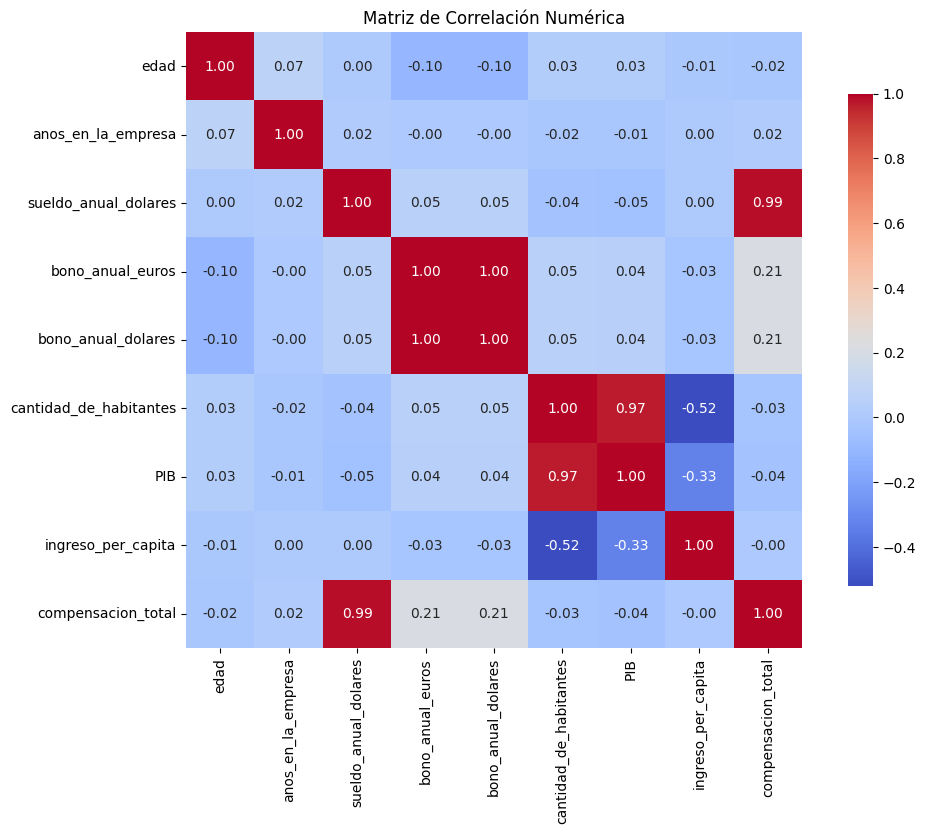

In [ ]:
# Matriz de correlación numérica con heatmap
df_salarios_pais_numerico = df_salarios_pais.select_dtypes(include=['number'])
df_salarios_pais_numerico = df_salarios_pais_numerico.dropna()     
plt.figure(figsize=(12, 8))
sns.heatmap(df_salarios_pais_numerico.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación Numérica')
plt.show()

## 1️⃣2️⃣ Pregunta  
**¿Qué porcentaje de empleados del dataset tiene educación universitaria?**

### ¿Por qué importa?**  
- Mide el nivel de formación académica dentro de la organización.  
- Sirve de referencia para programas de capacitación, becas y desarrollo profesional.  
- Permite contrastar la brecha (si existe) entre compensación y formación.

### Pista
Usa `value_counts(normalize=True)` en la columna `educacion_universitaria`, luego multiplica por 100 para obtener el porcentaje.

Text(0.5, 1.0, 'Porcentaje de Empleados con y sin Educación Universitaria')

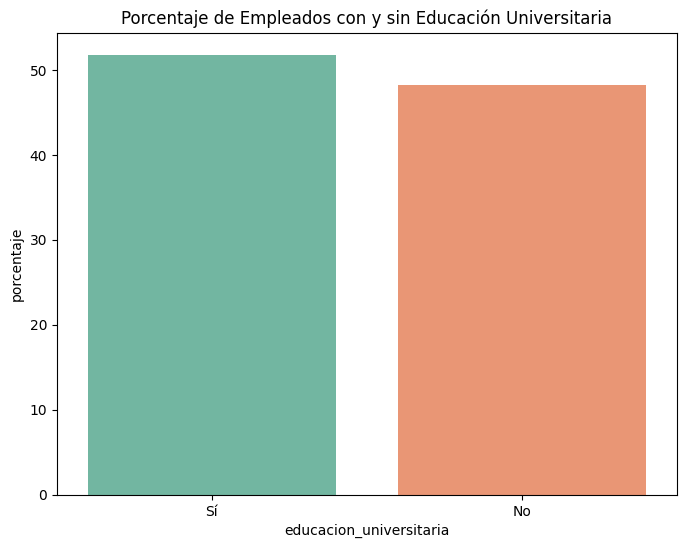

In [38]:
# Porcentaje de empleados con y sin educación universitaria
porcentaje_educacion = df_salarios_pais['educacion_universitaria'].value_counts(normalize=True) * 100
porcentaje_educacion = porcentaje_educacion.reset_index()
porcentaje_educacion.columns = ['educacion_universitaria', 'porcentaje']

plt.figure(figsize=(8, 6))
sns.barplot(data=porcentaje_educacion, x='educacion_universitaria', y='porcentaje', palette='Set2', hue='educacion_universitaria')
plt.title('Porcentaje de Empleados con y sin Educación Universitaria')

## 1️⃣3️⃣ Pregunta  
**¿Cuál es la compensación total promedio por país y nivel de senioridad?**  
*(Presenta la respuesta en una tabla pivote).*

### ¿Por qué importa?  
- Permite comparar si la diferencia salarial entre Juniors y Seniors es coherente en todos los países.  
- Identifica países donde los Seniors se pagan por encima o por debajo de la media global.  
- Ayuda a diseñar políticas de compensación regionales y ajustar los planes de carrera.

### Pista  
Crea una tabla pivote con `index='pais'`, `columns='senioridad'` y `values='compensacion_total'`, usando `aggfunc='mean'`.

In [39]:
# Tabla pivote: compensación promedio por país y senioridad
tabla_pivote = df_salarios_pais.pivot_table(index='pais', columns='senioridad', values='compensacion_total', aggfunc='mean')
tabla_pivote = tabla_pivote.reset_index()
tabla_pivote.columns.name = None
tabla_pivote

,pais,Junior,Senior
0,Argentina,89211.747368,96921.354545
1,Chile,97065.143750,98729.214286
2,Colombia,96912.622727,100323.395238
3,Costa Rica,103058.793333,86087.170833
4,México,86462.661111,94921.744000
5,Panamá,90936.825000,94432.906250
6,Perú,92564.366667,93887.389474
7,Uruguay,91380.053333,99751.686957


## 1️⃣4️⃣ Pregunta  
**¿Qué relación existe entre el salario anual y el bono anual?**  
*(Visualízalo en un scatterplot).*

### ¿Por qué importa?  
- Permite ver si los bonos son proporcionales al salario base o se otorgan de forma independiente.  
- Ayuda a detectar empleados con bonos atípicamente altos respecto a su sueldo.  
- Informa sobre la política de incentivos y su coherencia interna.

### Pista  
Usa `sns.scatterplot()` con `x='sueldo_anual_dolares'` y `y='bono_anual_dolares'`.

In [43]:
df_salarios_pais

,nombre,apellido,edad,pais,educacion_universitaria,nombre_de_la_empresa,cargo,anos_en_la_empresa,sueldo_anual_dolares,bono_anual_euros,bono_anual_dolares,capital,cantidad_de_habitantes,PIB,ingreso_per_capita,compensacion_total,senioridad
0,José,López,36,Chile,Sí,Mercado Libre,Python Developer,2,71841.0,4981.0,5479.1,Santiago,19116209.0,3.170000e+11,16580.0,77320.1,Junior
1,Fernanda,Vargas,39,Chile,Sí,Amazon,AI Software Engineer,2,142115.0,1252.0,1377.2,Santiago,19116209.0,3.170000e+11,16580.0,143492.2,Junior
2,Fernanda,Ramírez,30,Colombia,No,Facebook,Machine Learning Engineer,2,92278.0,5262.0,5788.2,Bogotá,51874024.0,3.430000e+11,6611.0,98066.2,Junior
3,José,Gómez,35,Chile,Sí,Mercado Libre,Python Developer,12,97130.0,3671.0,4038.1,Santiago,19116209.0,3.170000e+11,16580.0,101168.1,Senior
4,Ana,Pérez,32,Panamá,No,Amazon,Project Manager,2,61413.0,10190.0,11209.0,Ciudad de Panamá,4468000.0,7.600000e+10,16995.0,72622.0,Junior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,Luis,Ramírez,60,Argentina,No,Empresa Desconocida,Data Scientist,4,72011.0,6723.0,7395.3,Buenos Aires,45376763.0,6.410000e+11,14120.0,79406.3,Junior
303,José,Martínez,35,Chile,Sí,Empresa Desconocida,Data Engineer,3,97114.0,1684.0,1852.4,Santiago,19116209.0,3.170000e+11,16580.0,98966.4,Junior
304,Carlos,Flores,55,Uruguay,Sí,Empresa Desconocida,Machine Learning Engineer,1,104541.0,3128.0,3440.8,Montevideo,3518552.0,7.100000e+10,20300.0,107981.8,Junior
305,Lucía,Torres,36,Costa Rica,No,Empresa Desconocida,Software Engineer,0,86042.0,8746.0,9620.6,San José,5150000.0,8.650000e+10,14319.0,95662.6,Junior


Text(0.5, 1.0, 'Dispersión: Salario Anual vs Bono Anual')

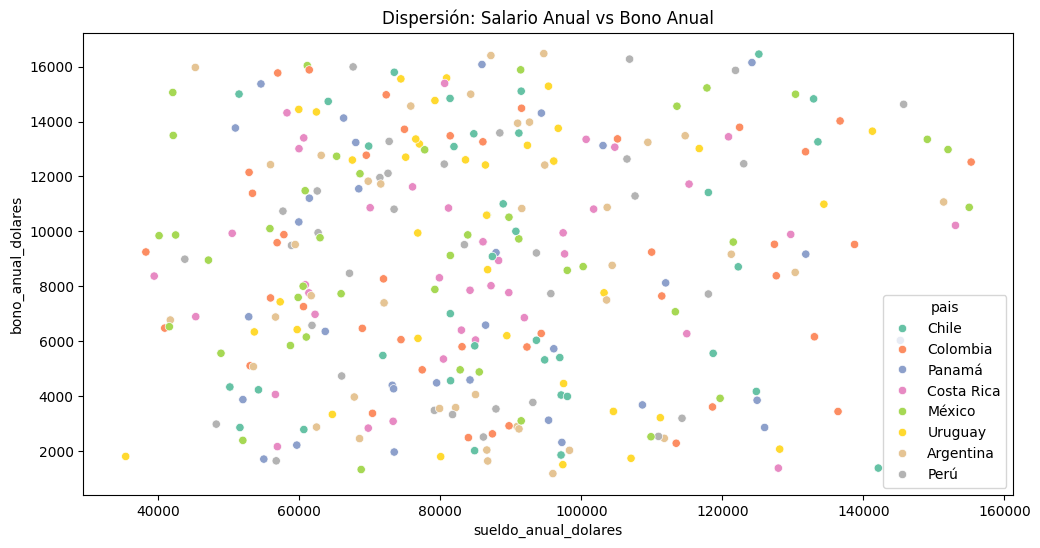

In [44]:
# Dispersión salario anual vs bono anual
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_salarios_pais, x='sueldo_anual_dolares', y='bono_anual_dolares', hue='pais', palette='Set2')
plt.title('Dispersión: Salario Anual vs Bono Anual')

## 1️⃣5️⃣ Pregunta  
**¿Qué porcentaje de empleados lleva más de 5 años en la empresa?**

### ¿Por qué importa?  
- Mide la **retención de talento** y la estabilidad de la plantilla.  
- Un porcentaje alto indica lealtad y experiencia acumulada; uno bajo puede señalar rotación elevada.  
- Informa iniciativas de engagement y programas de reconocimiento para empleados veteranos.

### Pista  
Aplica una condición `df['anos_en_la_empresa'] > 5`, usa `.mean()` para obtener la proporción y multiplícalo por 100.

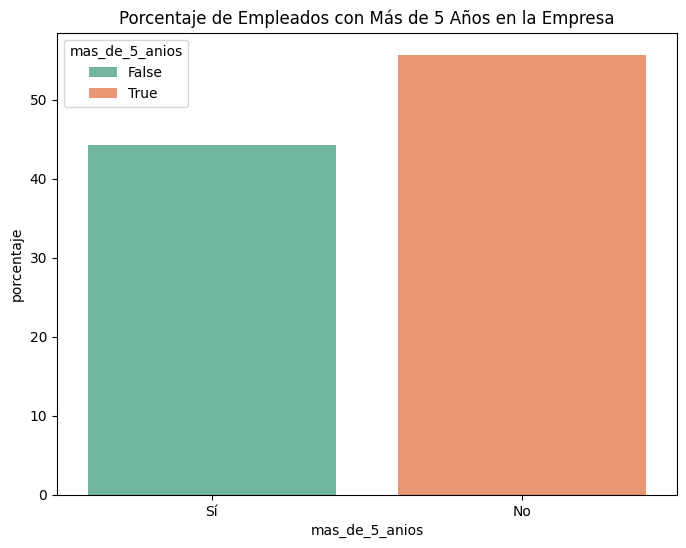

In [51]:
# Porcentaje de empleados con más de 5 años en la empresa
# debe ser mas de 5 años años y menos de 5 años el label
porcentaje_mas_5_anios = df_salarios_pais['anos_en_la_empresa'].apply(lambda x: x > 5).value_counts(normalize=True) * 100
porcentaje_mas_5_anios = porcentaje_mas_5_anios.reset_index()
porcentaje_mas_5_anios.columns = ['mas_de_5_anios', 'porcentaje']
plt.figure(figsize=(8, 6))
sns.barplot(data=porcentaje_mas_5_anios, x='mas_de_5_anios', y='porcentaje', palette='Set2', hue='mas_de_5_anios')
plt.title('Porcentaje de Empleados con Más de 5 Años en la Empresa')
porcentaje_mas_5_anios['mas_de_5_anios'] = porcentaje_mas_5_anios['mas_de_5_anios'].map({True: 'Sí', False: 'No'})
plt.xticks([0, 1], ['Sí', 'No'])
plt.show()

## 1️⃣6️⃣ Pregunta  
**¿Qué país presenta el bono anual promedio más alto?**

### ¿Por qué importa?  
- Indica dónde la empresa invierte más en incentivos variables.  
- Ayuda a evaluar la competitividad de los planes de bonificación por región.  
- Puede revelar disparidades que requieran revisión de políticas de compensación.

### Pista  
Agrupa por `pais`, calcula la media de `bono_anual_dolares` y ordena de mayor a menor.

In [52]:
# País con el bono anual promedio más alto
bono_anual_promedio_pais = df_salarios_pais.groupby('pais')['bono_anual_dolares'].mean().reset_index()
bono_anual_promedio_pais = bono_anual_promedio_pais.nlargest(1, 'bono_anual_dolares')
bono_anual_promedio_pais  

,pais,bono_anual_dolares
4,México,9359.848837


## 1️⃣7️⃣ Pregunta  
**¿Cómo varía la distribución de la compensación total entre países?**  
*(Muestra un boxplot por país para comparar rangos y outliers).*

### ¿Por qué importa?  
- Visualiza diferencias salariales entre mercados.  
- Ayuda a identificar países con mayor dispersión o presencia de outliers altos/bajos.  
- Facilita decisiones sobre ajustes regionales y equidad interna.

### Pista  
Emplea `sns.boxplot()` con `x='pais'` y `y='compensacion_total'`; rota las etiquetas para que no se solapen.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Chile'),
  Text(1, 0, 'Colombia'),
  Text(2, 0, 'Panamá'),
  Text(3, 0, 'Costa Rica'),
  Text(4, 0, 'México'),
  Text(5, 0, 'Uruguay'),
  Text(6, 0, 'Argentina'),
  Text(7, 0, 'Perú')])

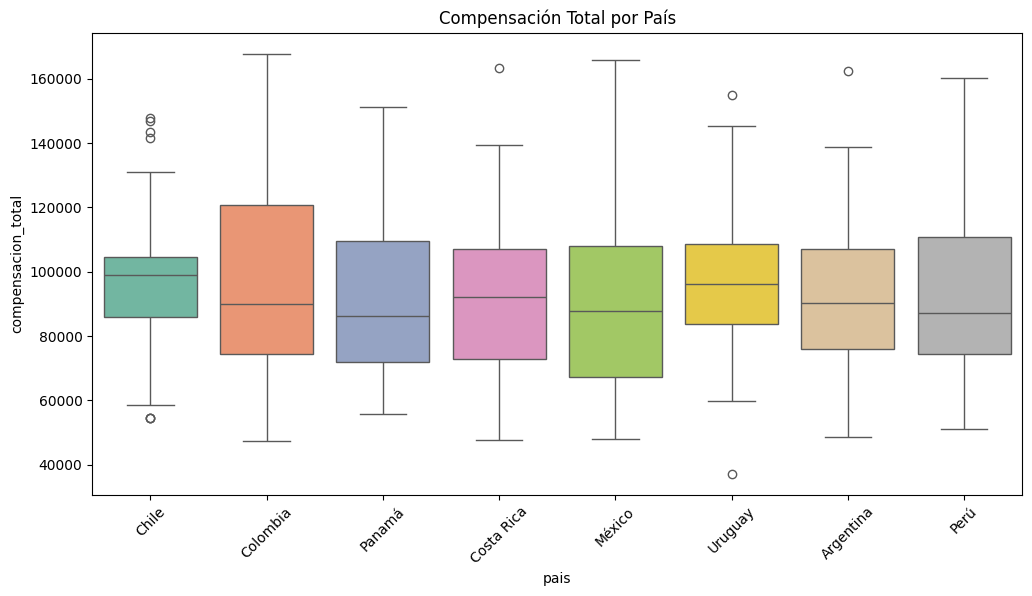

In [53]:
# Boxplot de compensación total por país
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_salarios_pais, x='pais', y='compensacion_total', palette='Set2', hue='pais')
plt.title('Compensación Total por País')
plt.xticks(rotation=45)

## 1️⃣8️⃣ Pregunta  
**¿Cuál es el promedio de años en la empresa para cada cargo?**

### ¿Por qué importa?  
- Indica qué roles retienen talento por más tiempo.  
- Ayuda a identificar posiciones con alta rotación que podrían requerir planes de carrera o incentivos adicionales.  
- Ofrece información para comparar madurez y profundidad de experiencia entre áreas.

### Pista  
Agrupa por `cargo`, aplica `mean()` sobre `anos_en_la_empresa` y ordena descendente para ver los cargos con mayor antigüedad media.

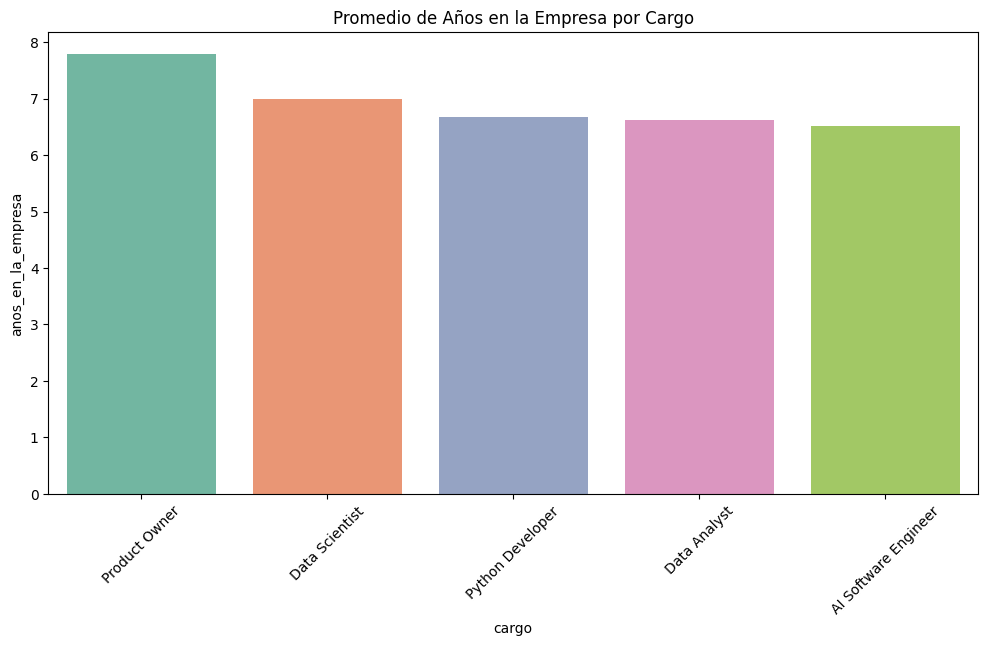

In [57]:
# Promedio de años en la empresa por cargo
# mostrar los 5 cargos con mayor promedio de años en la empresa
promedio_anios_por_cargo = df_salarios_pais.groupby('cargo')['anos_en_la_empresa'].mean().reset_index()
promedio_anios_por_cargo = promedio_anios_por_cargo.nlargest(5, 'anos_en_la_empresa')
plt.figure(figsize=(12, 6))
sns.barplot(data=promedio_anios_por_cargo, x='cargo', y='anos_en_la_empresa', palette='Set2', hue='cargo')
plt.title('Promedio de Años en la Empresa por Cargo')
plt.xticks(rotation=45)
plt.show()

## 1️⃣9️⃣ Pregunta  
**¿Cuál es la mediana del ingreso per cápita entre los países presentes en el dataset?**

### ¿Por qué importa?  
- Brinda un punto de referencia de **poder adquisitivo** promedio para las regiones donde opera la empresa.  
- Facilita comparar la compensación interna con los niveles de ingreso del país, aportando contexto sobre competitividad salarial local.  
- La mediana es robusta frente a valores extremos y refleja mejor el ingreso “típico” que el promedio en economías dispares.

### Pista  
Basta con aplicar `.median()` a la columna `ingreso_per_capita`.

In [58]:
# Mediana del ingreso per cápita de los países
mediana_ingreso_per_capita = df_salarios_pais.groupby('pais')['ingreso_per_capita'].median().reset_index()
mediana_ingreso_per_capita = mediana_ingreso_per_capita.nlargest(1, 'ingreso_per_capita')
mediana_ingreso_per_capita

,pais,ingreso_per_capita
7,Uruguay,20300.0


## 2️⃣0️⃣ Pregunta  
**¿Cómo se distribuyen los bonos anuales (USD) según el nivel de senioridad?**  
*(Representa la comparación con un violinplot).*

### ¿Por qué importa?  
- Muestra no solo la mediana y el rango, sino la **densidad completa** de los bonos para Juniors y Seniors.  
- Facilita detectar si los rangos de bonos se solapan o si los Seniors reciben incentivos notablemente mayores.  
- Ayuda a evaluar la equidad y efectividad del esquema de bonificación por experiencia.

### Pista  
Usa `sns.violinplot()` con `x='senioridad'` y `y='bono_anual_dolares'`.

([0, 1], [Text(0, 0, 'Junior'), Text(1, 0, 'Senior')])

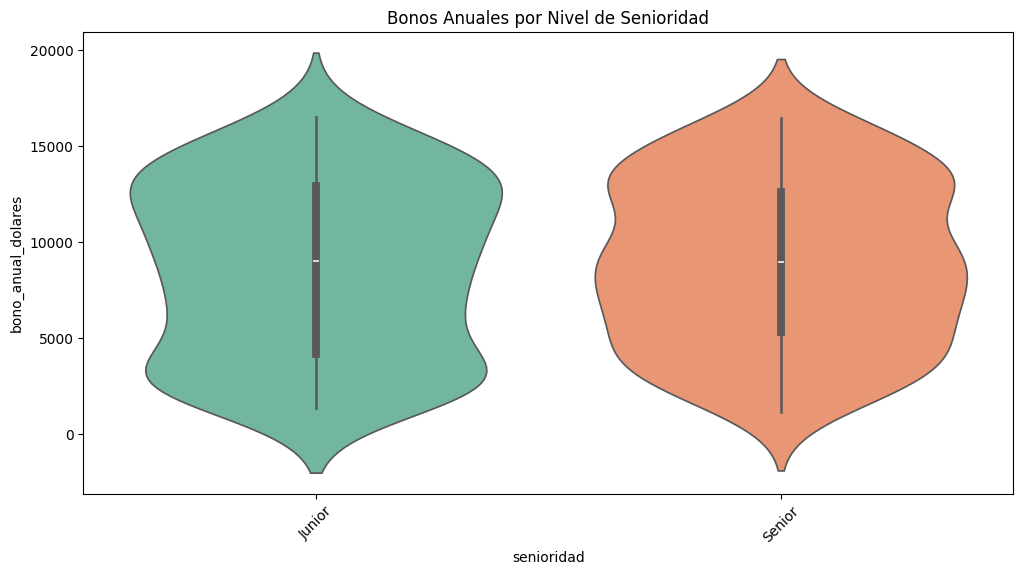

In [59]:
# Violinplot de bonos anuales por senioridad
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_salarios_pais, x='senioridad', y='bono_anual_dolares', palette='Set2', hue='senioridad')
plt.title('Bonos Anuales por Nivel de Senioridad')
plt.xticks(rotation=45)

## 🎉 ¡Felicidades!

Has completado el proyecto integral de **Análisis de Datos con Python**.  
Pasaste por todo el ciclo:

1. **Preparar el entorno**  
2. **Limpiar y transformar datos**  
3. **Explorar con visualizaciones**  
4. **Responder preguntas de negocio reales**

Cada notebook, gráfico y métrica que generaste demuestra tu capacidad para convertir datos en información valiosa. ¡Sigue practicando, comparte tus hallazgos con la comunidad PyData Panamá y recuerda que el siguiente insight puede cambiar una decisión clave!

🚀 **Buen trabajo, Data Analyst**. 